In [1]:
#conda install -c conda-forge librosa

In [2]:
from io import BytesIO
from zipfile import ZipFile
import urllib.request
import os,sys,requests,csv,wget,re
from bs4 import BeautifulSoup
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# librosa is a Python library for analyzing audio and music.
# It can be used to extract the data from the audio files we will see it later
import librosa 
import librosa.display

# to play the audio files
from IPython.display import Audio

In [3]:
os.chdir('D:\Education\Capstone\Speech Emotion Recognition')

In [4]:
os.getcwd()

'D:\\Education\\Capstone\\Speech Emotion Recognition'

In [5]:
url = 'https://zenodo.org/record/1188976'

data = requests.get(url)
data


<Response [200]>

In [6]:
html = BeautifulSoup(data.text, 'html.parser')
articles = html.select('a.filename')


In [7]:
articles[1]

<a class="filename" href="/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1">Audio_Speech_Actors_01-24.zip</a>

In [8]:
type(articles[1])

bs4.element.Tag

In [9]:
el=articles[1].get('href')
el

'/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1'

In [10]:
download_url="https://zenodo.org"+el
download_url

'https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1'

In [11]:
path = 'D:\Education\Capstone\Speech Emotion Recognition'
path

'D:\\Education\\Capstone\\Speech Emotion Recognition'

In [12]:
#  Just first time
#wget.download(download_url,out=path)

In [13]:
tess_url = 'https://borealisdata.ca/dataset.xhtml?persistentId=doi%3A10.5683%2FSP2%2FE8H2MF'

tess_data = requests.get(tess_url)
tess_data


<Response [200]>

In [14]:
tess_html = BeautifulSoup(tess_data.text, 'html.parser')


In [15]:
tess_html

<?xml version='1.0' encoding='UTF-8' ?>
<!DOCTYPE html>

<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml"><head id="j_idt18"><!-- Matomo -->
<script type="text/javascript">
  var _paq = window._paq || [];
  /* tracker methods like "setCustomDimension" should be called before "trackPageView" */
  _paq.push(['trackPageView']);
  _paq.push(['enableLinkTracking']);
  (function() {
    var u="https://analytics.scholarsportal.info/";
    _paq.push(['setTrackerUrl', u+'matomo.php']);
    _paq.push(['setSiteId', '47']);
    var d=document, g=d.createElement('script'), s=d.getElementsByTagName('script')[0];
    g.type='text/javascript'; g.async=true; g.defer=true; g.src=u+'matomo.js'; s.parentNode.insertBefore(g,s);
  })();
</script>
<!-- End Matomo Code -->
<title>Toronto emotional speech set (TESS) - University of Toronto Dataverse</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/

In [16]:
#tess_articles=html.select('a.datasetForm:j_idt252')
#tess_data = tess_html.select('div')
tess_data=tess_html.find("div", {"id": "actionButtonBlock"})

In [17]:
tess_data

<div id="actionButtonBlock"><div class="btn-group btn-group-justified">
<div class="btn-group">
<button aria-expanded="false" aria-haspopup="true" class="btn btn-primary btn-access-dataset dropdown-toggle" data-toggle="dropdown" type="button">
                                                        Access Dataset <span class="caret"></span>
</button>
<ul class="dropdown-menu pull-right text-left" style="padding-left:1em; padding-right:1em;">
<li class="dropdown-header">Download Options <span class="glyphicon glyphicon-download-alt"></span></li><li><a class="ui-commandlink ui-widget btn-download" href="#" id="datasetForm:j_idt252" onclick='PrimeFaces.ab({s:"datasetForm:j_idt252",f:"datasetForm",u:"datasetForm",onco:function(xhr,status,args,data){bind_bsui_components();showPopup();;},fi:"datasetForm:topDatasetBlockFragment"});return false;'>
                                                                    Download
                                                                       

In [18]:
tess_path="D:\Education\Capstone\Speech Emotion Recognition\\tess\\"

ravdess_path="D:\Education\Capstone\Speech Emotion Recognition\Audio_Speech_Actors_01-24\\"
tess_path,ravdess_path

('D:\\Education\\Capstone\\Speech Emotion Recognition\\tess\\',
 'D:\\Education\\Capstone\\Speech Emotion Recognition\\Audio_Speech_Actors_01-24\\')

In [32]:
# Get the data location for TESS
path = []
emotion = []
dir_list = os.listdir(tess_path)

dir_list.remove('MANIFEST.TXT')
dir_list

['OAF_back_angry.wav',
 'OAF_back_disgust.wav',
 'OAF_back_fear.wav',
 'OAF_back_happy.wav',
 'OAF_back_neutral.wav',
 'OAF_back_ps.wav',
 'OAF_back_sad.wav',
 'OAF_bar_angry.wav',
 'OAF_bar_disgust.wav',
 'OAF_bar_fear.wav',
 'OAF_bar_happy.wav',
 'OAF_bar_neutral.wav',
 'OAF_bar_ps.wav',
 'OAF_bar_sad.wav',
 'OAF_base_angry.wav',
 'OAF_base_disgust.wav',
 'OAF_base_fear.wav',
 'OAF_base_happy.wav',
 'OAF_base_neutral.wav',
 'OAF_base_ps.wav',
 'OAF_base_sad.wav',
 'OAF_bath_angry.wav',
 'OAF_bath_disgust.wav',
 'OAF_bath_fear.wav',
 'OAF_bath_happy.wav',
 'OAF_bath_neutral.wav',
 'OAF_bath_ps.wav',
 'OAF_bath_sad.wav',
 'OAF_bean_angry.wav',
 'OAF_bean_disgust.wav',
 'OAF_bean_fear.wav',
 'OAF_bean_happy.wav',
 'OAF_bean_neutral.wav',
 'OAF_bean_ps.wav',
 'OAF_bean_sad.wav',
 'OAF_beg_angry.wav',
 'OAF_beg_disgust.wav',
 'OAF_beg_fear.wav',
 'OAF_beg_happy.wav',
 'OAF_beg_neutral.wav',
 'OAF_beg_ps.wav',
 'OAF_beg_sad.wav',
 'OAF_bite_angry.wav',
 'OAF_bite_disgust.wav',
 'OAF_bite_f

In [33]:

for f in dir_list:
    if 'angry' in f:
        emotion.append('angry')
    elif 'disgust' in f:
        emotion.append('disgust')
    elif 'fear' in f:
        emotion.append('fear')
    elif 'happy'in f:
        emotion.append('happy')
    elif 'neutral' in f:
        emotion.append('neutral')                                
    elif 'surprise' in f:
        emotion.append('surprise')               
    elif 'sad' in f:
        emotion.append('sad')
    elif 'calm' in f:
        emotion.append('calm')
    elif 'ps' in f:
        emotion.append('surprise')
    else:
        emotion.append('Unknown')
    path.append(tess_path + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
#TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
print('TESS dataset')
TESS_df.head()

TESS dataset


,labels,path
0,angry,D:\Education\Capstone\Speech Emotion Recogniti...
1,disgust,D:\Education\Capstone\Speech Emotion Recogniti...
2,fear,D:\Education\Capstone\Speech Emotion Recogniti...
3,happy,D:\Education\Capstone\Speech Emotion Recogniti...
4,neutral,D:\Education\Capstone\Speech Emotion Recogniti...


In [21]:
TESS_df

,labels,path
0,angry,D:\Education\Capstone\Speech Emotion Recogniti...
1,disgust,D:\Education\Capstone\Speech Emotion Recogniti...
2,fear,D:\Education\Capstone\Speech Emotion Recogniti...
3,happy,D:\Education\Capstone\Speech Emotion Recogniti...
4,neutral,D:\Education\Capstone\Speech Emotion Recogniti...
...,...,...
2795,fear,D:\Education\Capstone\Speech Emotion Recogniti...
2796,happy,D:\Education\Capstone\Speech Emotion Recogniti...
2797,neutral,D:\Education\Capstone\Speech Emotion Recogniti...
2798,Unknown,D:\Education\Capstone\Speech Emotion Recogniti...


In [22]:
dir = os.listdir(ravdess_path)

males = []
females = [] 
        
dir

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [50]:
# Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
for actor in dir:
    files = os.listdir(ravdess_path + actor)    
    for file in files: 
        part = file.split('.')[0]
        part = part.split("-")               
        temp = int(part[6])        
        if part[2] == '01':
            emotion = 'neutral'
        elif part[2] == '02':
            emotion = 'calm'
        elif part[2] == '03':
            emotion = 'happy'
        elif part[2] == '04':
            emotion = 'sad'
        elif part[2] == '05':
            emotion = 'angry'
        elif part[2] == '06':
            emotion = 'fear'
        elif part[2] == '07':
            emotion = 'disgust'
        elif part[2] == '08':
            emotion = 'surprise'
        else:
            emotion = 'unknown'
        if temp%2 == 0:
            path = (ravdess_path + actor + '/' + file)
            #emotion = 'female_'+emotion
            females.append([emotion, path]) 
        else:
            path = (ravdess_path + actor + '/' + file)
            #emotion = 'male_'+emotion
            males.append([emotion, path])   
            
RavFemales_df = pd.DataFrame(females)
RavFemales_df.columns = ['labels', 'path']

RavMales_df = pd.DataFrame(males)
RavMales_df.columns = ['labels', 'path']

print('RAVDESS datasets')
RavFemales_df.head()

RAVDESS datasets


,labels,path
0,neutral,D:\Education\Capstone\Speech Emotion Recogniti...
1,neutral,D:\Education\Capstone\Speech Emotion Recogniti...
2,neutral,D:\Education\Capstone\Speech Emotion Recogniti...
3,neutral,D:\Education\Capstone\Speech Emotion Recogniti...
4,calm,D:\Education\Capstone\Speech Emotion Recogniti...


In [51]:
RavMales_df.labels.unique()

array(['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'disgust',
       'surprise'], dtype=object)

In [25]:
RavMales_df

,labels,path
0,neutral,D:\Education\Capstone\Speech Emotion Recogniti...
1,neutral,D:\Education\Capstone\Speech Emotion Recogniti...
2,neutral,D:\Education\Capstone\Speech Emotion Recogniti...
3,neutral,D:\Education\Capstone\Speech Emotion Recogniti...
4,calm,D:\Education\Capstone\Speech Emotion Recogniti...
...,...,...
715,surprise,D:\Education\Capstone\Speech Emotion Recogniti...
716,surprise,D:\Education\Capstone\Speech Emotion Recogniti...
717,surprise,D:\Education\Capstone\Speech Emotion Recogniti...
718,surprise,D:\Education\Capstone\Speech Emotion Recogniti...


In [34]:
Males = RavMales_df
Males.to_csv("males_emotions_df.csv", index = False)

Females = pd.concat([TESS_df, RavFemales_df], axis = 0)
Females.to_csv("females_emotions_df.csv", index = False)


In [41]:
ravdess_df=pd.concat([RavMales_df, RavFemales_df], axis = 0)
ravdess_df.to_csv("ravdess_emotions_df.csv", index = False)


In [35]:

final_df= pd.concat([TESS_df, RavFemales_df,RavMales_df], axis = 0)
final_df.to_csv("all_emotions_df.csv", index = False)

C:\Users\HARSHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HARSHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


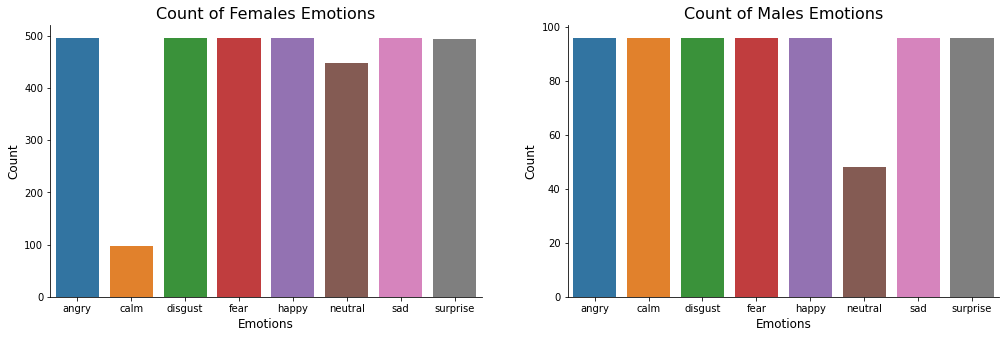

In [36]:
order = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']

fig = plt.figure(figsize=(17, 5))

fig.add_subplot(121)
plt.title('Count of Females Emotions', size=16)
sns.countplot(Females.labels, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

fig.add_subplot(122)
plt.title('Count of Males Emotions', size=16)
sns.countplot(Males.labels, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)




C:\Users\HARSHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


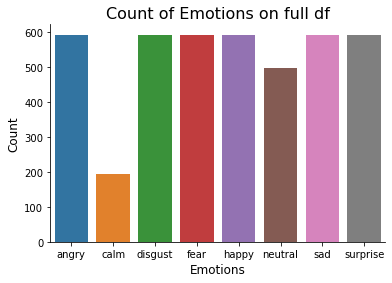

In [40]:

fig.add_subplot(122)
plt.title('Count of Emotions on full df', size=16)
sns.countplot(final_df.labels, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

C:\Users\HARSHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


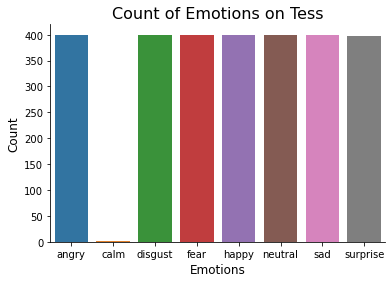

In [39]:

fig.add_subplot(122)
plt.title('Count of Emotions on Tess', size=16)
sns.countplot(TESS_df.labels, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

C:\Users\HARSHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


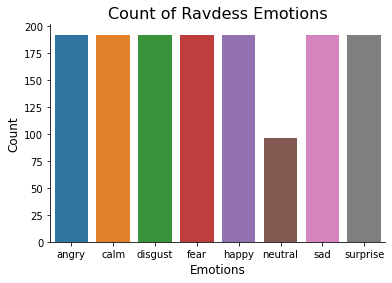

In [42]:
fig.add_subplot(122)
plt.title('Count of Ravdess Emotions', size=16)
sns.countplot(ravdess_df.labels, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)


In [78]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [79]:
emotion='Angry'
path =ravdess_path+ 'Actor_01\\03-01-05-01-01-01-01.wav'
path

'D:\\Education\\Capstone\\Speech Emotion Recognition\\Audio_Speech_Actors_01-24\\Actor_01\\03-01-05-01-01-01-01.wav'

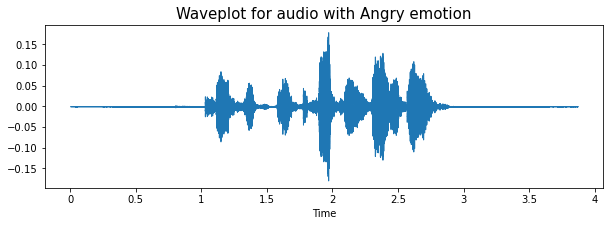

In [80]:
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

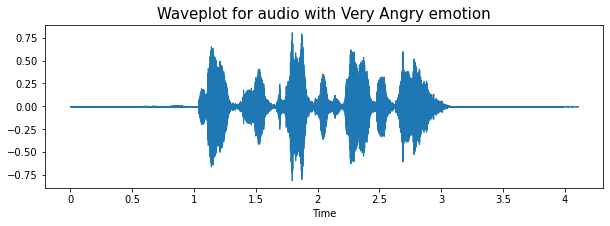

In [81]:
emotion='Very Angry' 
path = ravdess_path+ '\\Actor_01\\03-01-05-02-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

In [82]:
def noise(data):
    noise_amp = 0.04*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.70):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.8):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data, speed_factor)

def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data, speed_factor)

# taking any example and checking for techniques.
path = path = ravdess_path + '\\Actor_01\\03-01-05-01-01-01-01.wav'
data, sample_rate = librosa.load(path)

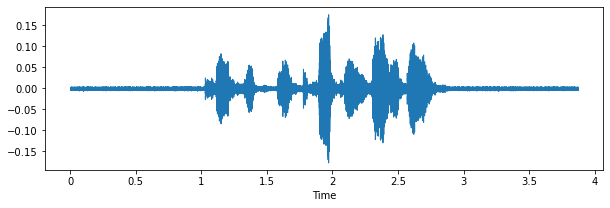

In [84]:
plt.figure(figsize=(10,3))
x = noise(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

C:\Users\HARSHA\AppData\Local\Temp\ipykernel_34260\2464426314.py:7: FutureWarning: Pass rate=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)


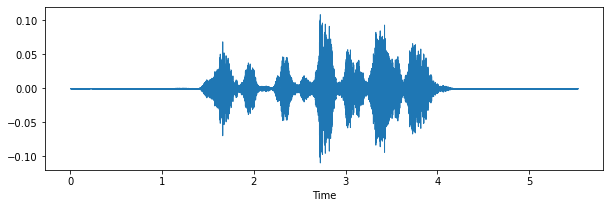

In [85]:
plt.figure(figsize=(10,3))
x = stretch(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

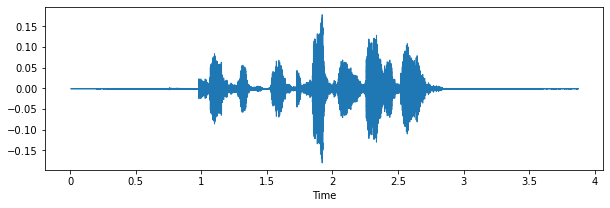

In [86]:
plt.figure(figsize=(10,3))
x = shift(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

C:\Users\HARSHA\AppData\Local\Temp\ipykernel_34260\2464426314.py:14: FutureWarning: Pass sr=22050, n_steps=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


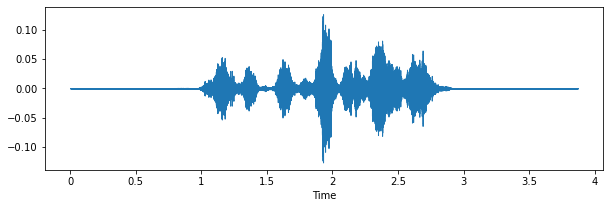

In [88]:
plt.figure(figsize=(10,3))
x = pitch(data, sample_rate)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

C:\Users\HARSHA\AppData\Local\Temp\ipykernel_34260\2464426314.py:17: FutureWarning: Pass rate=1.25 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, speed_factor)


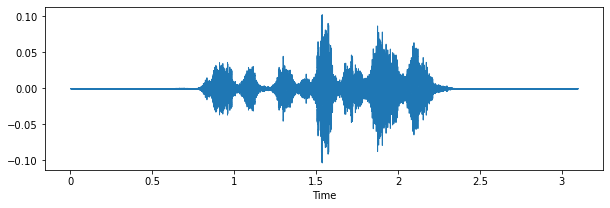

In [89]:
plt.figure(figsize=(10,3))
x = higher_speed(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

C:\Users\HARSHA\AppData\Local\Temp\ipykernel_34260\2464426314.py:20: FutureWarning: Pass rate=0.75 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, speed_factor)


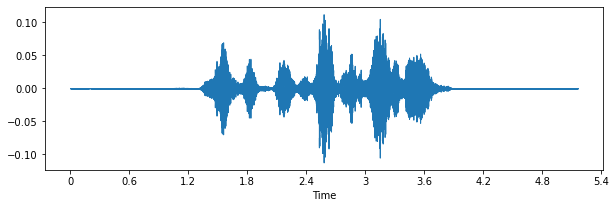

In [90]:
plt.figure(figsize=(10,3))
x = lower_speed(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [ ]:
#sample_rate = 22050

def extract_features(data):
    
    result = np.array([])
    
    #mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=42) #42 mfcc so we get frames of ~60 ms
    mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    result = np.array(mfccs_processed)
     
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast') 
    
    #without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    #noised
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    #stretched
    stretch_data = stretch(data)
    res3 = extract_features(stretch_data)
    result = np.vstack((result, res3))
    
    #shifted
    shift_data = shift(data)
    res4 = extract_features(shift_data)
    result = np.vstack((result, res4))
    
    #pitched
    pitch_data = pitch(data, sample_rate)
    res5 = extract_features(pitch_data)
    result = np.vstack((result, res5)) 
    
    #speed up
    higher_speed_data = higher_speed(data)
    res6 = extract_features(higher_speed_data)
    result = np.vstack((result, res6))
    
    #speed down
    lower_speed_data = higher_speed(data)
    res7 = extract_features(lower_speed_data)
    result = np.vstack((result, res7))
    
    return result